## ♻️ Like our prescription_parser, we can setup similar process for patient_details_parser

In [1]:
# importing necessary libraries
from pdf2image import convert_from_path
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL.PpmImagePlugin import PpmImageFile # used as type hint

# Setting required paths related to library functions
POPPLER_PATH = r"C:\poppler-24.02.0\Library\bin"
TESSERACT_ENGINE_PATH = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = TESSERACT_ENGINE_PATH

In [2]:
# A function to preprocess our image
def preprocess_image(img: PpmImageFile) -> np.ndarray:
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY) # Color image -> Grayscale image
    resized = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR) # Up-sizing for better extraction results
    processed_image = cv2.adaptiveThreshold(
        resized, # our resized image
        255, # max pixel value
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # adaptive thresholding
        # cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, # converting to binary (only black/white)
        65, # block size (after trial and error)
        13  # constant (after trial and error)
    )
    return processed_image

# A function to display before and after images and return extracted text
def display_and_extract(path: str) -> str:
    pages_1 = convert_from_path(path, poppler_path=POPPLER_PATH)
    img = preprocess_image(pages_1[0])
    # Display images
    plt.figure(figsize=(14,10))
    plt.subplot(1, 2, 1)
    plt.imshow(pages_1[0])
    plt.axis(False)
    plt.title("Image converted from PDF")
    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap="gray")
    plt.axis()
    plt.title("Preprocessed image")
    plt.show()
    print("-------------------------------------------------------------------")
    # return extracted text
    return pytesseract.image_to_string(img, lang="eng")

### 1️⃣ Patient Details Doc 1

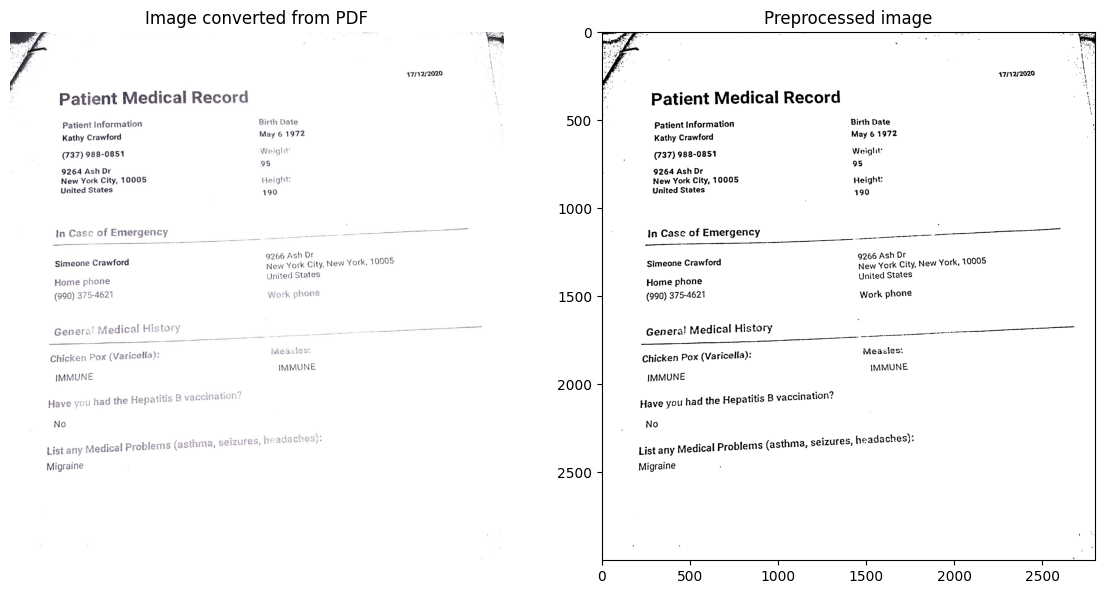

-------------------------------------------------------------------
17/12/2020

Patient Medical Record

Patient Information Birth Date

Kathy Crawford May 6 1972

(737) 988-0851 Weight’

9264 Ash Dr 95

New York City, 10005 ‘

United States Height
190

In Case of Emergency
ee
Simeone Crawford 9266 Ash Dr
H New York City, New York, 10005
ome phone United States
(990) 375-4621
Work phone
Genera! Medical History
_

eS I ee

ne

a enna

Chicken Pox (Varicella): Measies:

IMMUNE IMMUNE

Have you had the Hepatitis B vaccination?

No

List any Medical Problems (asthma, seizures, headaches):

Migraine



In [3]:
# Let's try extracting text from our patient_details_doc_1
DOC_1_PATH = r"E:\Projects\medical-data-extraction\backend\resources\patient_details\pd_1.pdf"

print(display_and_extract(DOC_1_PATH))

### 2️⃣ Patient Details Doc 2

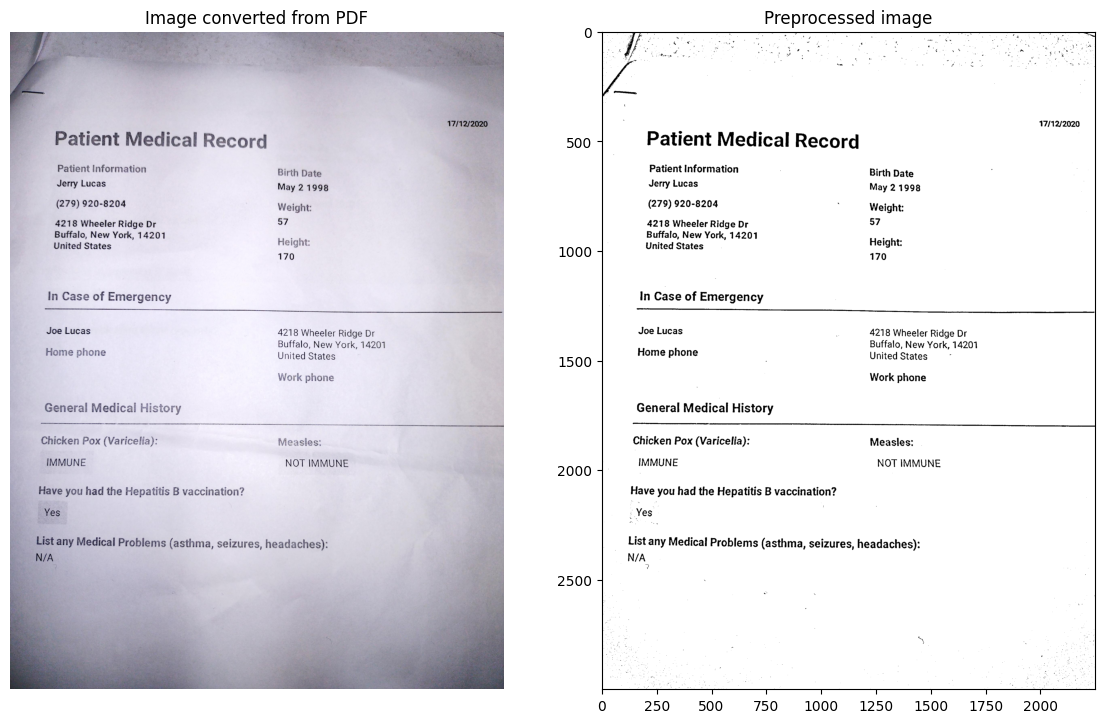

-------------------------------------------------------------------
17/12/2020

Patient Medical Record

Patient Information Birth Date
Jerry Lucas May 2 1998
(279) 920-8204 " Weight:
4218 Wheeler Ridge Dr $7
anaes 14201 Height:

In Case of Emergency
meee

Joe Lucas 4218 Wheeler Ridge Dr
Buffalo, New York, 14201
Home phone United States
Work phone

General Medical History

Chicken Pox (Varicelia): Measles:

IMMUNE NOT IMMUNE
Have you had the Hepatitis B vaccination?
Yes ,

List any Medical Problems (asthma, seizures, headaches):
N/A



In [4]:
# Let's try extracting text from our patient_details_doc_2
DOC_2_PATH = r"E:\Projects\medical-data-extraction\backend\resources\patient_details\pd_2.pdf"

print(display_and_extract(DOC_2_PATH))